# **Preprocesado**

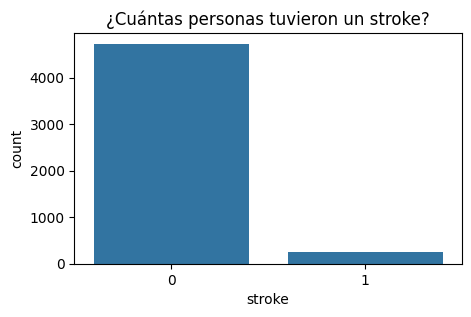

Proporción de personas con y sin stroke:
stroke
0    0.950211
1    0.049789
Name: proportion, dtype: float64

Valores nulos explícitos por columna:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Total de valores nulos explícitos: 0
Valores únicos de 'gender': [0 1]
Archivo exportado a ../data/processed/preprocessing.csv


In [1]:
# ==========================================================
# PREPROCESAMIENTO SIN DIVISIÓN TRAIN/TEST NI SMOTE
# ==========================================================

# PASO 1: Cargar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# PASO 2: Cargar el dataset 
df = pd.read_csv('../data/raw/stroke_dataset.csv')

# PASO 3: Visualizar y analizar la variable objetivo (stroke)
plt.figure(figsize=(5,3))
sns.countplot(x='stroke', data=df)
plt.title('¿Cuántas personas tuvieron un stroke?')
plt.show()
print('Proporción de personas con y sin stroke:')
print(df['stroke'].value_counts(normalize=True))

# PASO 4: Comprobar si hay datos faltantes (nulos)
print("\nValores nulos explícitos por columna:")
print(df.isnull().sum())
print(f"Total de valores nulos explícitos: {df.isnull().sum().sum()}")

# PASO 5: Transformar variables categóricas a números
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].map({'Urban': 0, 'Rural': 1})
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)
print("Valores únicos de 'gender':", df['gender'].unique())

# PASO 6: Aplicar logaritmo a avg_glucose_level para reducir el efecto de valores extremos
df['avg_glucose_level_log'] = np.log1p(df['avg_glucose_level'])

# PASO 7: Definir columnas numéricas y categóricas finales
num_cols = ['age', 'avg_glucose_level_log', 'bmi']
bin_cat_cols = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'Residence_type']
cat_cols = [col for col in df.columns if col.startswith('work_type_') or col.startswith('smoking_status_')]

# PASO 8: Concatenar variables numéricas y categóricas
X = df[num_cols + bin_cat_cols + cat_cols]
y = df['stroke']

# PASO 9: Estandarizar SOLO las columnas numéricas continuas en todo el dataset
scaler = StandardScaler()
X_std = X.copy()
X_std[num_cols] = scaler.fit_transform(X[num_cols])

# Concatenar la variable objetivo para exportar
df_final = X_std.copy()
df_final['stroke'] = y

# PASO 10: Exportar el archivo a la carpeta processed
df_final.to_csv('../data/processed/preprocessing.csv', index=False)
print("Archivo exportado a ../data/processed/preprocessing.csv")